<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [0]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

## 1) *Optional:* Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [19]:
import requests
from bs4 import BeautifulSoup
url = "https://www.indeed.com/jobs?q=data+scientist"
url2 = "https://www.indeed.com/viewjob?jk="

html = BeautifulSoup(requests.get(url+"&limit=50").text, "html.parser")
ids = []
step = 50
for n in range(0, 100, step):
  html = BeautifulSoup(requests.get(url+"&limit={}&start={}".format(step, n)).text, "html.parser")
  print(len(ids))
  ids += [i.get("data-jk") for i in html.find_all("div", class_="jobsearch-SerpJobCard")]

ids = list(set(ids))[:100]

titles = []
descs = []
for i in ids:
  html2 = BeautifulSoup(requests.get(url2+i).text, "html.parser")
  titles += [html2.find_all("h3", class_ ="jobsearch-JobInfoHeader-title")[0].text]
  descs += [" ".join(html2.find_all("div", class_ ="jobsearch-jobDescriptionText")[0].text.lower().strip().split())]




0
59


NameError: ignored

In [21]:
df_jobs = pd.DataFrame()
df_jobs["title"] = titles
df_jobs["desc"] = descs

df_jobs.head(5)

,title,desc
0,Data Scientist,job description: we are looking for a data sci...
1,"Data Scientist, Analytics - Instagram ML",facebook's mission is to give people the power...
2,"Siri - Data Scientist, Data Organization","summary posted: nov 22, 2019 weekly hours: 40 ..."
3,"Data Scientist, Junior",the challenge: are you excited at the prospect...
4,"Data Scientist, Senior",collaborate with assigned departments to provi...


## 2) Use Spacy to tokenize / clean the listings 

In [34]:
import urllib.request

stop_words = [i[:-1].decode("utf-8") for i in urllib.request.urlopen("https://raw.githubusercontent.com/fozziethebeat/S-Space/master/data/english-stop-words-large.txt")]

def make_tokens(text):
  split_text = re.sub(r"[^A-Za-z\ \']", "", text).lower().strip().split()
  split_text = [i.split("'")[0] for i in split_text if i not in stop_words]
  return split_text

df_jobs["tokens"] = df_jobs["desc"].apply(make_tokens)
print(len(df_jobs))
df_jobs.head()



100


,title,desc,tokens
0,Data Scientist,job description: we are looking for a data sci...,"[job, description, data, scientist, support, p..."
1,"Data Scientist, Analytics - Instagram ML",facebook's mission is to give people the power...,"[facebook, mission, give, people, power, build..."
2,"Siri - Data Scientist, Data Organization","summary posted: nov 22, 2019 weekly hours: 40 ...","[summary, posted, nov, weekly, hours, role, nu..."
3,"Data Scientist, Junior",the challenge: are you excited at the prospect...,"[challenge, excited, prospect, unlocking, secr..."
4,"Data Scientist, Senior",collaborate with assigned departments to provi...,"[collaborate, assigned, departments, provide, ..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [0]:
v = CountVectorizer()

all_words = []
for i in df_jobs["tokens"]:
  all_words += i

len(all_words)

fit = v.fit_transform(all_words)
words = v.get_feature_names();    
counts = fit.toarray().sum(axis=0)  
word_occur = pd.DataFrame().from_dict(dict(zip(words, counts)), orient="index", columns=["occurrence"])


## 4) Visualize the most common word counts

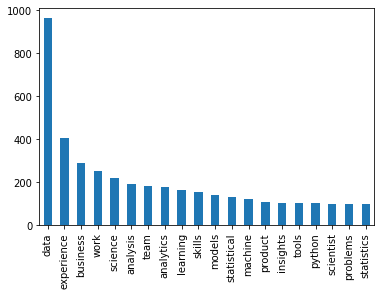

In [65]:
import matplotlib.pyplot as plt

word_occur = word_occur.sort_values(by=["occurrence"], ascending=False).head(20)
word_occur.head()
word_occur["occurrence"].plot(kind="bar")

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [123]:
ftidf_v = TfidfVectorizer()

all_words = []
for i in df_jobs["tokens"]:
  all_words += i

len(all_words)

fit = ftidf_v.fit_transform(df_jobs["desc"])

word_percent = pd.DataFrame(fit.toarray(), columns=ftidf_v.get_feature_names())
word_percent.head()

,00,000,0010,02,03,04,06,0660,07,078,09,10,100,1058838,10660449,11,110,11246,1155,117191,12,120,129,13,130,14,140,15,152352,1530,155,16,1600,165,17,170,1725,18,19,19001jkv,...,workloads,workplace,workplaces,works,workstream,world,worldwide,worldwork,would,wow,wp,wrangle,wrangling,write,writing,written,wws,www,xandr,xbox,xmbzxxkka,xp,year,yeareducation,yearexperience,yearfull,years,yearwork,yes,yesadditional,yielding,york,yorktown,you,your,yourself,youtube,zach,zacharypiper,zillow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.022559,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.025696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.107088,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021972,0.0,0.0,0.0,0.000000,0.0,0.0,0.068627,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.031762,0.0,0.0,0.0,0.0,0.000000,0.0,0.025509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.054997,0.0,0.0,0.157865,0.017180,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.066746,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.042443,0.0,0.025343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.285160,0.119481,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.054235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.089696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029975,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [147]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(algorithm='brute', n_neighbors=1)
nn.fit(word_percent)

def query(text):
  index = nn.kneighbors(ftidf_v.transform([text]))[1][0][0]
  return df_jobs["desc"][index]

query("data science facebook youtube")

"facebook's mission is to give people the power to build community and bring the world closer together. through our family of apps and services, we're building a different kind of company that connects billions of people around the world, gives them ways to share what matters most to them, and helps bring people closer together. whether we're creating new products or helping a small business expand its reach, people at facebook are builders at heart. our global teams are constantly iterating, solving problems, and working together to empower people around the world to build community and connect in meaningful ways. together, we can help people build stronger communities — we're just getting started. are you passionate about facebook’s product, analytics and technology? the analytics team is looking for fast-moving analytics candidates and data junkies who want to make an impact. candidates will help own analytics for a particular product or business at facebook and work with product ma

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 